In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# the below extension properly formats a cell after it is run
%load_ext nb_black

# Set the maximum number of rows to 200
pd.set_option("display.max_rows", 200)


# Set the maximum number of columns to 200
pd.set_option("display.max_columns", 200)

<IPython.core.display.Javascript object>

In [3]:
housing = pd.read_csv("../data/housing_corr.csv")

<IPython.core.display.Javascript object>

In [29]:
for name in housing.columns:
    print(name, ": number of values", len(housing[name].value_counts()))

PID : number of values 2558
SalePrice : number of values 914
MSSubClass : number of values 16
MSZoning : number of values 6
LotFrontage : number of values 127
LotArea : number of values 1741
Street : number of values 2
Alley : number of values 3
LotShape : number of values 4
LandContour : number of values 4
Utilities : number of values 2
LotConfig : number of values 5
LandSlope : number of values 3
Neighborhood : number of values 26
Condition1 : number of values 9
Condition2 : number of values 8
BldgType : number of values 5
HouseStyle : number of values 8
OverallQual : number of values 10
OverallCond : number of values 9
RoofStyle : number of values 6
RoofMatl : number of values 7
Exterior1st : number of values 15
Exterior2nd : number of values 16
MasVnrType : number of values 4
MasVnrArea : number of values 414
ExterCond : number of values 5
Foundation : number of values 6
BsmtQual : number of values 6
BsmtCond : number of values 6
BsmtExposure : number of values 5
BsmtFinSF1 : numbe

<IPython.core.display.Javascript object>

In [30]:
housing.drop(
    ["PID", "Neighborhood_st"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

## Oridnal Coding since this is the preferred method for Random Forest over Dummifying (One-Hot Encoding) ##

In [31]:
# get a list of categorical features (i.e., object type columns)
cat_features = list(housing.select_dtypes(include=["object"]).columns)
cat_features.remove("Neighborhood")

<IPython.core.display.Javascript object>

In [32]:
from sklearn.preprocessing import OrdinalEncoder

# create an instance of the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()


# fit the ordinal encoder to the categorical features
ordinal_encoder.fit(housing[cat_features])

# transform the categorical features into encoded numerical values
housing[cat_features] = ordinal_encoder.transform(housing[cat_features])


<IPython.core.display.Javascript object>

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()

# Encode the neighborhood column and store the mapping
housing['NeighborhoodEncoded'] = label_encoder.fit_transform(housing['Neighborhood'])
neighborhood_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Get unique neighborhoods
unique_neighborhoods = housing['Neighborhood'].unique()

# Loop through each neighborhood
for neighborhood in unique_neighborhoods:
    print(f"Analyzing neighborhood: {neighborhood}")
    
    # Filter data based on the neighborhood
    neighborhood_data = housing[housing['Neighborhood'] == neighborhood]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(neighborhood_data.drop(["SalePrice", "Neighborhood", "NeighborhoodEncoded"], axis=1), neighborhood_data["SalePrice"], test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Calculate feature importances
    feature_importances = rf.feature_importances_

    # Analyze the feature importances
    important_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values('Importance', ascending=False).head(5)

    print(important_features)
    print("\n")

# Print the mapping between neighborhood names and encoded values
print("Neighborhood mapping:")
print(neighborhood_mapping)


Analyzing neighborhood: SWISU
         Feature  Importance
35      2ndFlrSF    0.157702
61       TotalSF    0.112373
16   OverallCond    0.104800
42  TotRmsAbvGrd    0.071526
3        LotArea    0.070801


Analyzing neighborhood: Edwards
       Feature  Importance
61     TotalSF    0.380209
3      LotArea    0.138225
47  GarageArea    0.082139
59         Age    0.053246
60    RemodAge    0.031181


Analyzing neighborhood: IDOTRR
        Feature  Importance
61      TotalSF    0.355999
15  OverallQual    0.207659
60     RemodAge    0.073947
49   PavedDrive    0.064591
35     2ndFlrSF    0.054537


Analyzing neighborhood: OldTown
        Feature  Importance
61      TotalSF    0.351097
35     2ndFlrSF    0.162087
15  OverallQual    0.079209
16  OverallCond    0.070586
18     RoofMatl    0.039303


Analyzing neighborhood: NWAmes
          Feature  Importance
61        TotalSF    0.672153
35       2ndFlrSF    0.059292
58  SaleCondition    0.033609
47     GarageArea    0.032596
42   TotRmsAbv

<IPython.core.display.Javascript object>

## Random Forest to determine each feature correlation with sale price ##

In [36]:


# Create an instance of the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()

# Encode the Neighborhood column
housing['NeighborhoodEncoded'] = ordinal_encoder.fit_transform(housing[['Neighborhood']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(housing.drop(["SalePrice", "Neighborhood"], axis=1), housing["SalePrice"], test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate feature importances
feature_importances = rf.feature_importances_

# Analyze the feature importances
important_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values('Importance', ascending=False)

print(important_features)


                Feature  Importance
15          OverallQual    0.489539
61              TotalSF    0.310159
59                  Age    0.020941
35             2ndFlrSF    0.016088
41          KitchenQual    0.015583
47           GarageArea    0.012832
3               LotArea    0.011795
60             RemodAge    0.011290
64            TotalBath    0.011272
28           BsmtFinSF1    0.010304
30            BsmtUnfSF    0.009602
16          OverallCond    0.006532
44           Fireplaces    0.005701
25             BsmtQual    0.004743
63         TotalPorchSF    0.004146
50           WoodDeckSF    0.003957
67  NeighborhoodEncoded    0.003761
2           LotFrontage    0.003724
22           MasVnrArea    0.003724
51          OpenPorchSF    0.003231
55               MoSold    0.002918
1              MSZoning    0.002534
36         BsmtFullBath    0.001862
65       MSSubClass_cat    0.001802
45           GarageType    0.001731
53          ScreenPorch    0.001588
46         GarageFinish    0

<IPython.core.display.Javascript object>

## Using Random Forest to Look at the most important feature for each street grouping ##

In [38]:
# Running throught the process from Creating_test_train notebook to create quantiles

# Loading Dateset again
housing = pd.read_csv("../data/housing_corr.csv")


# Splitting the data into train test and stratifying on neighborhood since that is what we are intested in
train_set, test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["Neighborhood"], random_state=42
)


def group_neighbor_streets_by_saleprice(
    traindf=train_set,
    testdf=test_set,
    num_quantiles=10,  # notice the difference in this line!!
):
    # Calculate the mean sale price for each street in the training df
    street_prices = traindf.groupby("Neighborhood_st")["SalePrice"].mean()
    # Group the streets into the specified number of quantiles based on sale price
    labels = [f"group_{i+1}" for i in range(num_quantiles)]
    groups = pd.qcut(street_prices, q=num_quantiles, labels=range(1, num_quantiles + 1))
    # Create a dictionary that maps each street name to its corresponding sale price group label
    street_group_dict = dict(zip(street_prices.index, groups))
    # Add a new column to the training dataframe with the street price groups
    traindf["StreetPriceGroup"] = traindf["Neighborhood_st"].map(street_group_dict)
    # Add a new column to the testing dataframe with the street price groups
    testdf["StreetPriceGroup"] = testdf["Neighborhood_st"].map(street_group_dict)
    return street_group_dict


# this will use the dictionary created to fill in the missing values in the test df with
# another group in the same neighborhood


def fill_na(testdf=test_set, d={}):
    # Extract the first part of the string in the "Neighborhood_st" column
    testdf["Neighborhood_prefix"] = testdf["Neighborhood_st"].map(
        lambda x: x.split("_")[0]
    )
    # Create a new dict that only contains the neighborhood
    new_dict = {k.split("_")[0]: v for k, v in d.items()}
    # Create a list of PIDs with missing StreetPriceGroup values
    na_pid_list = testdf[testdf["StreetPriceGroup"].isna()]["PID"].tolist()
    # Create a Boolean mask to filter the DataFrame
    mask = testdf["PID"].isin(na_pid_list)
    # Apply the dictionary mapping only to the filtered rows
    testdf.loc[mask, "StreetPriceGroup"] = testdf[mask]["Neighborhood_prefix"].map(
        new_dict
    )
    # Drop the column since there is no more use for it
    testdf.drop("Neighborhood_prefix", axis=1, inplace=True)


# the num of quantiles can be changed and it is assigned to d which is the dictionary that
# will be used to fill in the missing values

d = group_neighbor_streets_by_saleprice(
    traindf=train_set, testdf=test_set, num_quantiles=10,
)

fill_na(test_set, d)


# Remove the column that was used to create groupings
# train_set.drop("Neighborhood_st", axis=1, inplace=True)
# test_set.drop("Neighborhood_st", axis=1, inplace=True)


# overly complicated code to remove PID and move SalePrice to first column
# I need to do this in the future and save the csv's after so we dont have to do this each time
train_set = train_set.iloc[
    :,
    train_set.columns.tolist().index("SalePrice") : (
        train_set.columns.tolist().index("SalePrice") + 1
    ),
].join(train_set.drop(columns=["SalePrice", "PID"]))
# same with test set
test_set = test_set.iloc[
    :,
    test_set.columns.tolist().index("SalePrice") : (
        test_set.columns.tolist().index("SalePrice") + 1
    ),
].join(test_set.drop(columns=["SalePrice", "PID"]))

<IPython.core.display.Javascript object>

In [45]:
# get a list of categorical features (i.e., object type columns)
cat_features = list(train_set.select_dtypes(include=["object"]).columns)

# create an instance of the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()


# fit the ordinal encoder to the categorical features
ordinal_encoder.fit(train_set[cat_features])

# transform the categorical features into encoded numerical values
train_set[cat_features] = ordinal_encoder.transform(train_set[cat_features])


<IPython.core.display.Javascript object>

In [55]:
# get a list of categorical features (i.e., object type columns)
cat_features = list(test_set.select_dtypes(include=["object"]).columns)

# create an instance of the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()


# fit the ordinal encoder to the categorical features
ordinal_encoder.fit(test_set[cat_features])

# transform the categorical features into encoded numerical values
test_set[cat_features] = ordinal_encoder.transform(test_set[cat_features])

<IPython.core.display.Javascript object>

In [42]:
# Remove the column that was used to create groupings
train_set.drop("Neighborhood_st", axis=1, inplace=True)
test_set.drop("Neighborhood_st", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Sort unique values in the StreetPriceGroup column by mean SalePrice in ascending order
group_means = train_set.groupby('StreetPriceGroup')['SalePrice'].mean()
unique_groups = group_means.sort_values().index

# Loop through each value in the StreetPriceGroup column
for group in unique_groups:
    print(f"Analyzing group: {group}")
    
    # Filter data based on the StreetPriceGroup value
    group_data = train_set[train_set['StreetPriceGroup'] == group]

    # Print mean SalePrice for the group
    print(f"Mean SalePrice: {group_data['SalePrice'].mean()}")

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(group_data.drop(["SalePrice", "StreetPriceGroup"], axis=1), group_data["SalePrice"], test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Calculate feature importances
    feature_importances = rf.feature_importances_

    # Analyze the feature importances
    important_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values('Importance', ascending=False).head(5)

    print(important_features)
    print("\n")


NameError: name 'train_set' is not defined

In [ ]:
## Looking at the feature importance on SalePrice when adding the StreetPriceGroup variable. 

In [54]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set.drop("SalePrice", axis=1), train_set["SalePrice"], test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Calculate feature importances
feature_importances = rf.feature_importances_

# Analyze the feature importances
important_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values('Importance', ascending=False)

print(important_features)


             Feature  Importance
68  StreetPriceGroup    0.658141
62           TotalSF    0.180576
16       OverallQual    0.033746
26          BsmtQual    0.009102
29        BsmtFinSF1    0.008874
48        GarageArea    0.008305
36          2ndFlrSF    0.008026
61          RemodAge    0.007759
23        MasVnrArea    0.007466
3            LotArea    0.006697
65         TotalBath    0.006286
31         BsmtUnfSF    0.005421
60               Age    0.005041
17       OverallCond    0.004357
64      TotalPorchSF    0.003726
51        WoodDeckSF    0.003237
42       KitchenQual    0.002851
2        LotFrontage    0.002566
54       ScreenPorch    0.002385
52       OpenPorchSF    0.002282
43      TotRmsAbvGrd    0.002102
56            MoSold    0.001971
11      Neighborhood    0.001753
49        GarageQual    0.001693
47      GarageFinish    0.001394
21       Exterior2nd    0.001322
40      BedroomAbvGr    0.001320
19          RoofMatl    0.001213
57            YrSold    0.001191
45        

<IPython.core.display.Javascript object>

## Using the top 20 features from above to predict SalePrice ##

In [61]:
from sklearn.metrics import mean_absolute_error, r2_score


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set[important_features['Feature'][:20].tolist()], train_set["SalePrice"], test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict SalePrice using the test data
y_pred = rf.predict(X_test)

# Calculate Mean Absolute Error (MAE) and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared score:", r2)



Mean Absolute Error: 14018.455731707316
R-squared score: 0.9160173334216787


<IPython.core.display.Javascript object>

## Trying again with bagging regressor ##

In [63]:

# Select the top 20 features
top_20_features = important_features.head(20)["Feature"].tolist()


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set[top_20_features], train_set["SalePrice"], test_size=0.2, random_state=42)

# Create and fit the Bagging Regressor with a Random Forest base estimator
rf = RandomForestRegressor(n_estimators=100, random_state=42)
bagging_rf = BaggingRegressor(base_estimator=rf, n_estimators=10, random_state=42)
bagging_rf.fit(X_train, y_train)

# Predict SalePrice on the testing set
y_pred = bagging_rf.predict(X_test)

# Calculate Mean Absolute Error (MAE) and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared score:", r2)


Mean Absolute Error: 13902.682904878047
R-squared score: 0.916587279890754


<IPython.core.display.Javascript object>

## Now trying Stacking and Boosting with top 20 features ##

In [66]:
# import pandas as pd
# import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split

# Select the top 20 features
top_20_features = important_features['Feature'][:20].tolist()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set[top_20_features], train_set["SalePrice"], test_size=0.2, random_state=42)

# Define base estimators
rf = RandomForestRegressor(n_estimators=100, random_state=42)
dt = DecisionTreeRegressor(random_state=42)

# Create the stacking regressor using the base estimators
estimators = [('rf', rf), ('dt', dt)]
stack_reg = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor(random_state=42))

# Fit the stacking regressor to the training data
stack_reg.fit(X_train, y_train)

# Predict using the stacking regressor
y_pred_stack = stack_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE) and R-squared score
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print("Stacking Regressor Results:")
print("Mean Absolute Error:", mae_stack)
print("R-squared score:", r2_stack)

# Create the boosting regressor using the base estimator
boost_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit the boosting regressor to the training data
boost_reg.fit(X_train, y_train)

# Predict using the boosting regressor
y_pred_boost = boost_reg.predict(X_test)

# Calculate Mean Absolute Error (MAE) and R-squared score
mae_boost = mean_absolute_error(y_test, y_pred_boost)
r2_boost = r2_score(y_test, y_pred_boost)

print("\nBoosting Regressor Results:")
print("Mean Absolute Error:", mae_boost)
print("R-squared score:", r2_boost)


Stacking Regressor Results:
Mean Absolute Error: 15146.804259213986
R-squared score: 0.9029411144822934

Boosting Regressor Results:
Mean Absolute Error: 13328.839803176925
R-squared score: 0.9290692109057372


<IPython.core.display.Javascript object>

## Seeing if there is a difference when using all features and not top 20 ##

In [67]:
# Random Forestbbb

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set.drop("SalePrice", axis=1), train_set["SalePrice"], test_size=0.2, random_state=42)

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate Mean Absolute Error (MAE) and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R-squared score:", r2)


Mean Absolute Error: 14087.587317073172
R-squared score: 0.9141713429944978


<IPython.core.display.Javascript object>

In [68]:
# Bagging

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set.drop("SalePrice", axis=1), train_set["SalePrice"], test_size=0.2, random_state=42)

# Create and fit the Bagging Regressor with a Random Forest base estimator
rf = RandomForestRegressor(n_estimators=100, random_state=42)
bagging = BaggingRegressor(base_estimator=rf, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

# Make predictions and calculate scores
y_pred = bagging.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Bagging - Mean Absolute Error:", mae)
print("Bagging - R-squared score:", r2)


Bagging - Mean Absolute Error: 13996.095329268293
Bagging - R-squared score: 0.913565262760414


<IPython.core.display.Javascript object>

In [70]:
# Stacking

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set.drop("SalePrice", axis=1), train_set["SalePrice"], test_size=0.2, random_state=42)

# Create base estimators
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('knn', KNeighborsRegressor()),
    ('svr', SVR()),
]

# Create and fit the Stacking Regressor with a Linear Regression final estimator
stacking = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking.fit(X_train, y_train)

# Make predictions and calculate scores
y_pred = stacking.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Stacking - Mean Absolute Error:", mae)
print("Stacking - R-squared score:", r2)


Stacking - Mean Absolute Error: 14067.524329716342
Stacking - R-squared score: 0.9142560891429595


<IPython.core.display.Javascript object>

In [71]:
# Boosting


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    train_set.drop("SalePrice", axis=1),
    train_set["SalePrice"],
    test_size=0.2,
    random_state=42,
)

# Create and fit the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions and calculate scores
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Boosting - Mean Absolute Error:", mae)
print("Boosting - R-squared score:", r2)

Boosting - Mean Absolute Error: 12704.623040466531
Boosting - R-squared score: 0.935640719186301


<IPython.core.display.Javascript object>

## XGBoost ##

In [75]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set.drop("SalePrice", axis=1), train_set["SalePrice"], test_size=0.2, random_state=42)

# Create and fit the XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xgb_model.predict(X_test)

# Calculate Mean Absolute Error (MAE) and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost - Mean Absolute Error:", mae)
print("XGBoost - R-squared score:", r2)


XGBoost - Mean Absolute Error: 12184.325304878048
XGBoost - R-squared score: 0.9370510881429757


<IPython.core.display.Javascript object>

## Hyperparameter tuning with GridSearchCV ##

In [77]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 500],
}

# Initialize the XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(
    xgb_reg, 
    param_grid, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Use the best model to make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Calculate the Mean Absolute Error (MAE) and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Mean Absolute Error: 11577.684041539635
R-squared score: 0.9471523720329054


<IPython.core.display.Javascript object>

## Using the most important features for each street grouping to create a new feature that is grouping neighborhood_st variables on these important features ##


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define the features to use in the clustering
features = ['TotalSF', 'OverallQual', 'OverallCond', 'SaleCondition', 'RemodAge', 'GarageArea', 'BsmtFinSF1', 'TotalBath']

# Define the range of cluster sizes to try
n_clusters_range = range(6, 21)

# Load the neighborhood_st strings from the dataset
neighborhood_st_strings = housing['Neighborhood_st'].values

# Convert the neighborhood_st strings to a matrix of numerical features using TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(neighborhood_st_strings)

# Iterate over the range of cluster sizes and compute the silhouette score for each
silhouette_scores = []
for n_clusters in n_clusters_range:
    # Fit the KMeans clustering algorithm to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)

    # Compute the silhouette score for the clustering
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Find the optimal number of clusters based on the silhouette scores
optimal_n_clusters = n_clusters_range[np.argmax(silhouette_scores)]

# Fit the KMeans algorithm to the data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans.fit(X)

# Add the cluster labels as a new feature in the dataset
housing['neighborhood_st_cluster'] = kmeans.labels_


<IPython.core.display.Javascript object>

In [8]:
housing["neighborhood_st_cluster"].value_counts().sum()

2558

<IPython.core.display.Javascript object>

In [9]:
cluster_table = pd.crosstab(index=housing["neighborhood_st_cluster"], columns="count")
print(cluster_table)


col_0                    count
neighborhood_st_cluster       
0                         2252
1                           18
2                           28
3                           12
4                           16
5                           10
6                           15
7                           14
8                           25
9                           22
10                          15
11                          13
12                           8
13                          19
14                           6
15                          15
16                          13
17                          18
18                          20
19                          19


<IPython.core.display.Javascript object>

In [13]:
# Dropping feature since there is too much of an imbalance
housing.drop(
    ["neighborhood_st_cluster"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

## trying hierachical instead of KMeans ##

<IPython.core.display.Javascript object>

In [24]:
# get a list of categorical features (i.e., object type columns)
cat_features = list(housing.select_dtypes(include=["object"]).columns)
# cat_features.remove("Neighborhood")

# create an instance of the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()


# fit the ordinal encoder to the categorical features
ordinal_encoder.fit(housing[cat_features])

# transform the categorical features into encoded numerical values
housing[cat_features] = ordinal_encoder.transform(housing[cat_features])


<IPython.core.display.Javascript object>

27     42
33     25
319    25
224    24
69     20
       ..
393     1
230     1
566     1
470     1
390     1
Name: neighborhood_st_cluster, Length: 611, dtype: int64


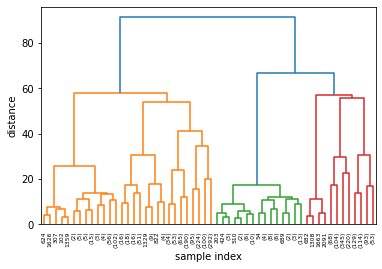

<IPython.core.display.Javascript object>

In [16]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select the features to use in the clustering
features = ['TotalSF', 'OverallQual', 'OverallCond', 'SaleCondition', 'RemodAge', 'GarageArea', 'BsmtFinSF1', 'TotalBath', 'Condition1', 'Condition2']

# Scale the features to have zero mean and unit variance
scaler = StandardScaler()
X = scaler.fit_transform(housing[features])

# Define the hierarchical clustering algorithm
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=2, linkage='ward')

# Fit the clustering algorithm to the data
labels = agg_clustering.fit_predict(X)

# Add the cluster labels as a new feature in the DataFrame
housing['neighborhood_st_cluster'] = labels

# Print the count of observations in each cluster
cluster_counts = housing['neighborhood_st_cluster'].value_counts()
print(cluster_counts)

# Visualize the dendrogram of the hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.xlabel('sample index')
plt.ylabel('distance')
plt.show()


,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSSubClass_cat,Street_type,Neighborhood_st,neighborhood_st_cluster
0,909176150,126000,30,4.0,0.0,7890,1.0,1.0,3.0,3.0,0.0,0.0,0.0,SWISU,2.0,2.0,0.0,2.0,6,6,1.0,0.0,13.0,14.0,2.0,0.0,2,1.0,3,3,1,238.0,0.0,618.0,1.0,2,1.0,3.0,0,1.0,0.0,0,2,1,2,4,6.0,1,5.0,1,399.0,3,2.0,0,0,0,166,0,3,2010,9.0,4.0,71,60,1712.0,1,166,2.0,6.0,0.0,383.0,517
1,905476230,139500,120,4.0,42.0,4235,1.0,1.0,3.0,3.0,0.0,4.0,0.0,Edwards,2.0,2.0,4.0,2.0,5,5,1.0,0.0,6.0,6.0,1.0,149.0,2,1.0,4,3,2,552.0,393.0,104.0,1.0,2,1.0,3.0,0,1.0,0.0,0,2,1,3,5,6.0,0,1.0,3,266.0,3,2.0,0,105,0,0,0,2,2009,9.0,4.0,25,25,2098.0,0,105,3.0,0.0,10.0,130.0,11
2,911128020,124900,30,0.0,60.0,6060,1.0,1.0,3.0,3.0,0.0,4.0,0.0,IDOTRR,2.0,2.0,0.0,2.0,5,9,3.0,0.0,8.0,8.0,2.0,0.0,2,0.0,3,3,1,737.0,0.0,100.0,1.0,4,1.0,3.0,0,0.0,0.0,0,2,1,3,5,6.0,0,5.0,1,216.0,3,0.0,154,0,42,0,0,11,2007,9.0,4.0,77,0,1838.0,1,128,1.0,6.0,10.0,169.0,397
3,535377150,114000,70,4.0,80.0,8146,1.0,1.0,3.0,3.0,0.0,0.0,0.0,OldTown,2.0,2.0,0.0,5.0,4,8,1.0,0.0,8.0,8.0,2.0,0.0,3,0.0,2,3,1,0.0,0.0,405.0,1.0,3,1.0,3.0,322,0.0,0.0,0,2,1,2,6,6.0,0,5.0,1,281.0,3,0.0,0,0,168,111,0,5,2009,9.0,4.0,109,6,1444.0,1,279,1.0,11.0,0.0,366.0,571
4,534177230,227000,60,4.0,70.0,8400,1.0,1.0,3.0,3.0,0.0,4.0,0.0,NWAmes,2.0,2.0,0.0,5.0,8,6,1.0,0.0,12.0,13.0,2.0,0.0,2,2.0,4,3,1,643.0,0.0,167.0,1.0,4,1.0,3.0,855,1.0,0.0,1,3,1,3,6,6.0,0,1.0,3,528.0,3,2.0,0,45,0,0,0,11,2009,9.0,4.0,8,8,2475.0,0,45,3.5,10.0,0.0,291.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,903205040,121000,30,4.0,0.0,8854,1.0,1.0,3.0,3.0,0.0,4.0,0.0,BrkSide,2.0,2.0,0.0,1.0,6,6,1.0,0.0,13.0,14.0,2.0,0.0,2,0.0,3,3,1,0.0,0.0,952.0,3.0,1,0.0,1.0,0,0.0,0.0,0,2,1,1,4,6.0,1,5.0,1,192.0,2,1.0,0,98,0,40,0,5,2009,9.0,4.0,93,59,1904.0,1,138,1.0,6.0,0.0,17.0,99
2554,905402060,139600,20,4.0,0.0,13680,1.0,1.0,0.0,3.0,0.0,1.0,0.0,Edwards,2.0,2.0,0.0,2.0,3,5,3.0,0.0,3.0,14.0,2.0,0.0,2,3.0,0,0,0,0.0,0.0,0.0,1.0,4,1.0,0.0,0,0.0,0.0,0,4,1,2,8,3.0,1,1.0,1,452.0,3,2.0,0,0,0,0,0,6,2009,9.0,4.0,54,54,1733.0,0,0,2.0,5.0,2.0,112.0,198
2555,909275030,145000,90,3.0,82.0,6270,1.0,1.0,3.0,1.0,0.0,4.0,0.0,Crawfor,2.0,2.0,2.0,5.0,5,6,1.0,0.0,8.0,8.0,2.0,0.0,2,1.0,3,3,1,284.0,0.0,717.0,1.0,2,0.0,0.0,1001,0.0,0.0,0,4,2,2,8,6.0,0,0.0,1,871.0,3,2.0,0,0,0,0,0,8,2007,9.0,4.0,58,57,3003.0,1,0,2.0,15.0,4.0,91.0,237
2556,907192040,217500,60,4.0,0.0,8826,1.0,1.0,3.0,3.0,0.0,4.0,0.0,CollgCr,2.0,2.0,0.0,5.0,7,5,1.0,0.0,12.0,13.0,1.0,144.0,2,2.0,4,3,1,841.0,0.0,144.0,1.0,4,1.0,3.0,857,1.0,0.0,1,3,1,3,7,6.0,1,1.0,3,486.0,3,2.0,193,96,0,0,0,7,2007,9.0,4.0,7,7,2827.0,0,96,3.5,10.0,1.0,38.0,522


<IPython.core.display.Javascript object>

## Decisions trees represented visually to show importance of features in each neighborhood ##

In [22]:
housing

,PID,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,BsmtFullBath,BsmtHalfBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,Age,RemodAge,TotalSF,Remodeled,TotalPorchSF,TotalBath,MSSubClass_cat,Street_type,Neighborhood_st,neighborhood_st_cluster
0,909176150,126000,30,4.0,0.0,7890,1.0,1.0,3.0,3.0,0.0,0.0,0.0,SWISU,2.0,2.0,0.0,2.0,6,6,1.0,0.0,13.0,14.0,2.0,0.0,2,1.0,3,3,1,238.0,0.0,618.0,1.0,2,1.0,3.0,0,1.0,0.0,0,2,1,2,4,6.0,1,5.0,1,399.0,3,2.0,0,0,0,166,0,3,2010,9.0,4.0,71,60,1712.0,1,166,2.0,6.0,0.0,383.0,517
1,905476230,139500,120,4.0,42.0,4235,1.0,1.0,3.0,3.0,0.0,4.0,0.0,Edwards,2.0,2.0,4.0,2.0,5,5,1.0,0.0,6.0,6.0,1.0,149.0,2,1.0,4,3,2,552.0,393.0,104.0,1.0,2,1.0,3.0,0,1.0,0.0,0,2,1,3,5,6.0,0,1.0,3,266.0,3,2.0,0,105,0,0,0,2,2009,9.0,4.0,25,25,2098.0,0,105,3.0,0.0,10.0,130.0,11
2,911128020,124900,30,0.0,60.0,6060,1.0,1.0,3.0,3.0,0.0,4.0,0.0,IDOTRR,2.0,2.0,0.0,2.0,5,9,3.0,0.0,8.0,8.0,2.0,0.0,2,0.0,3,3,1,737.0,0.0,100.0,1.0,4,1.0,3.0,0,0.0,0.0,0,2,1,3,5,6.0,0,5.0,1,216.0,3,0.0,154,0,42,0,0,11,2007,9.0,4.0,77,0,1838.0,1,128,1.0,6.0,10.0,169.0,397
3,535377150,114000,70,4.0,80.0,8146,1.0,1.0,3.0,3.0,0.0,0.0,0.0,OldTown,2.0,2.0,0.0,5.0,4,8,1.0,0.0,8.0,8.0,2.0,0.0,3,0.0,2,3,1,0.0,0.0,405.0,1.0,3,1.0,3.0,322,0.0,0.0,0,2,1,2,6,6.0,0,5.0,1,281.0,3,0.0,0,0,168,111,0,5,2009,9.0,4.0,109,6,1444.0,1,279,1.0,11.0,0.0,366.0,571
4,534177230,227000,60,4.0,70.0,8400,1.0,1.0,3.0,3.0,0.0,4.0,0.0,NWAmes,2.0,2.0,0.0,5.0,8,6,1.0,0.0,12.0,13.0,2.0,0.0,2,2.0,4,3,1,643.0,0.0,167.0,1.0,4,1.0,3.0,855,1.0,0.0,1,3,1,3,6,6.0,0,1.0,3,528.0,3,2.0,0,45,0,0,0,11,2009,9.0,4.0,8,8,2475.0,0,45,3.5,10.0,0.0,291.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,903205040,121000,30,4.0,0.0,8854,1.0,1.0,3.0,3.0,0.0,4.0,0.0,BrkSide,2.0,2.0,0.0,1.0,6,6,1.0,0.0,13.0,14.0,2.0,0.0,2,0.0,3,3,1,0.0,0.0,952.0,3.0,1,0.0,1.0,0,0.0,0.0,0,2,1,1,4,6.0,1,5.0,1,192.0,2,1.0,0,98,0,40,0,5,2009,9.0,4.0,93,59,1904.0,1,138,1.0,6.0,0.0,17.0,99
2554,905402060,139600,20,4.0,0.0,13680,1.0,1.0,0.0,3.0,0.0,1.0,0.0,Edwards,2.0,2.0,0.0,2.0,3,5,3.0,0.0,3.0,14.0,2.0,0.0,2,3.0,0,0,0,0.0,0.0,0.0,1.0,4,1.0,0.0,0,0.0,0.0,0,4,1,2,8,3.0,1,1.0,1,452.0,3,2.0,0,0,0,0,0,6,2009,9.0,4.0,54,54,1733.0,0,0,2.0,5.0,2.0,112.0,198
2555,909275030,145000,90,3.0,82.0,6270,1.0,1.0,3.0,1.0,0.0,4.0,0.0,Crawfor,2.0,2.0,2.0,5.0,5,6,1.0,0.0,8.0,8.0,2.0,0.0,2,1.0,3,3,1,284.0,0.0,717.0,1.0,2,0.0,0.0,1001,0.0,0.0,0,4,2,2,8,6.0,0,0.0,1,871.0,3,2.0,0,0,0,0,0,8,2007,9.0,4.0,58,57,3003.0,1,0,2.0,15.0,4.0,91.0,237
2556,907192040,217500,60,4.0,0.0,8826,1.0,1.0,3.0,3.0,0.0,4.0,0.0,CollgCr,2.0,2.0,0.0,5.0,7,5,1.0,0.0,12.0,13.0,1.0,144.0,2,2.0,4,3,1,841.0,0.0,144.0,1.0,4,1.0,3.0,857,1.0,0.0,1,3,1,3,7,6.0,1,1.0,3,486.0,3,2.0,193,96,0,0,0,7,2007,9.0,4.0,7,7,2827.0,0,96,3.5,10.0,1.0,38.0,522


<IPython.core.display.Javascript object>

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

# Get a list of unique neighborhoods in the dataset
neighborhoods = housing['Neighborhood'].unique()

# Train a decision tree model on each neighborhood subset
for neighborhood in neighborhoods:
    # Subset the data by neighborhood
    subset = housing[housing['Neighborhood'] == neighborhood]
    
    # Extract the features and target variable
    X = subset.drop('SalePrice', axis=1)
    y = subset['SalePrice']
    
    # Train a decision tree model on the subset
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)
    
    # Export the decision tree as a dot file
    dot_data = export_graphviz(model, out_file=None, 
                               feature_names=X.columns.values, 
                               filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    
    # View the decision tree
    graph.render(filename=f"{neighborhood}_tree", format='pdf')


<IPython.core.display.Javascript object>

In [39]:
housing = pd.read_csv("../data/housing_corr.csv")
# Droppping features
housing.drop(
    ["PID", "Neighborhood_st"], axis=1, inplace=True,
)

<IPython.core.display.Javascript object>

In [40]:
# get a list of categorical features (i.e., object type columns)
cat_features = list(housing.select_dtypes(include=["object"]).columns)
cat_features.remove("Neighborhood")

# create an instance of the OrdinalEncoder class
ordinal_encoder = OrdinalEncoder()


# fit the ordinal encoder to the categorical features
ordinal_encoder.fit(housing[cat_features])

# transform the categorical features into encoded numerical values
housing[cat_features] = ordinal_encoder.transform(housing[cat_features])


<IPython.core.display.Javascript object>

In [41]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer





# Select your features and target
X = housing.drop(['SalePrice'], axis=1)
y = housing['SalePrice']

# Find categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

X_transformed = column_transformer.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=column_transformer.get_feature_names_out())

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=3)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
sorted_idx = importances.argsort()

# Print feature importances
for i, idx in enumerate(sorted_idx):
    print(f"{X_transformed.columns[idx]}: {importances[idx]}")

# Export one of the trees using Graphviz
tree = rf.estimators_[0]
dot_data = export_graphviz(tree, out_file=None, feature_names=X_transformed.columns, filled=True, rounded=True, special_characters=True)

# Create a 'visuals' subfolder if it doesn't exist
if not os.path.exists('visuals'):
    os.makedirs('visuals')

# Save the tree visualization as a PNG file
graph = graphviz.Source(dot_data)
graph.render('visuals/tree_visualization', format='png', cleanup=True)


one_hot__Neighborhood_Blmngtn: 0.0
remainder__HeatingQC: 0.0
remainder__Heating: 0.0
remainder__BsmtFinSF2: 0.0
remainder__BsmtExposure: 0.0
remainder__BsmtCond: 0.0
remainder__Foundation: 0.0
remainder__ExterCond: 0.0
remainder__MasVnrArea: 0.0
remainder__MasVnrType: 0.0
remainder__MSSubClass_cat: 0.0
remainder__Exterior1st: 0.0
remainder__RoofMatl: 0.0
remainder__RoofStyle: 0.0
remainder__OverallCond: 0.0
remainder__HouseStyle: 0.0
remainder__Electrical: 0.0
remainder__BldgType: 0.0
remainder__BsmtHalfBath: 0.0
remainder__BedroomAbvGr: 0.0
remainder__TotalPorchSF: 0.0
remainder__Remodeled: 0.0
remainder__SaleCondition: 0.0
remainder__SaleType: 0.0
remainder__MoSold: 0.0
remainder__Fence: 0.0
remainder__EnclosedPorch: 0.0
remainder__OpenPorchSF: 0.0
remainder__PavedDrive: 0.0
remainder__GarageQual: 0.0
remainder__GarageFinish: 0.0
remainder__GarageType: 0.0
remainder__Functional: 0.0
remainder__TotRmsAbvGrd: 0.0
remainder__KitchenAbvGr: 0.0
remainder__HalfBath: 0.0
remainder__Conditio

'visuals/tree_visualization.png'

<IPython.core.display.Javascript object>

## Making PDFs of trees for each neighborhood ##

In [48]:
import graphviz
from sklearn.tree import export_graphviz

# Loop through each neighborhood
for neighborhood in unique_neighborhoods:
    print(f"Analyzing neighborhood: {neighborhood}")
    
    # Filter data based on the neighborhood
    neighborhood_data = housing[housing['Neighborhood'] == neighborhood]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(neighborhood_data.drop(["SalePrice", "Neighborhood", "NeighborhoodEncoded"], axis=1), neighborhood_data["SalePrice"], test_size=0.2, random_state=42)

    # Train the Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Calculate feature importances
    feature_importances = rf.feature_importances_

    # Analyze the feature importances
    important_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances}).sort_values('Importance', ascending=False).head(5)

    print(important_features)
    print("\n")

    # Save the first tree as a PDF
    dot_data = export_graphviz(rf.estimators_[0], feature_names=X_train.columns, filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    graph.render(f"visuals/{neighborhood}_tree")


Analyzing neighborhood: SWISU
         Feature  Importance
35      2ndFlrSF    0.157702
61       TotalSF    0.112373
16   OverallCond    0.104800
42  TotRmsAbvGrd    0.071526
3        LotArea    0.070801


Analyzing neighborhood: Edwards
       Feature  Importance
61     TotalSF    0.380209
3      LotArea    0.138225
47  GarageArea    0.082139
59         Age    0.053246
60    RemodAge    0.031181


Analyzing neighborhood: IDOTRR
        Feature  Importance
61      TotalSF    0.355999
15  OverallQual    0.207659
60     RemodAge    0.073947
49   PavedDrive    0.064591
35     2ndFlrSF    0.054537


Analyzing neighborhood: OldTown
        Feature  Importance
61      TotalSF    0.351097
35     2ndFlrSF    0.162087
15  OverallQual    0.079209
16  OverallCond    0.070586
18     RoofMatl    0.039303


Analyzing neighborhood: NWAmes
          Feature  Importance
61        TotalSF    0.672153
35       2ndFlrSF    0.059292
58  SaleCondition    0.033609
47     GarageArea    0.032596
42   TotRmsAbv

<IPython.core.display.Javascript object>

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the features of interest
X = housing[['Condition1', 'Condition2']]
y = housing['SalePrice']

# Encode the categorical features using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = tree.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Export the tree as a PDF
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('condition_tree')


Mean Squared Error: 5678959682.340661


'condition_tree.pdf'

<IPython.core.display.Javascript object>